## Multidimensional Scaling

Sample 10000 images from MNIST training dataset such that each class has equal number of images, and then construct the distance matrix D for all the pairs of points. Project these data points into 2-dimensional space, such that the new distance matrix M' closely approximates M.
 
It's clearly to see the separations among the digits. ‘9’s and ‘8’s are close to each other compared to the distance to other digits, which makes sense because ‘9’s and ‘8’s are somewhat alike so the distance between the two is smaller. By contrast, ‘0’s are far from ‘3’s because the unsimilarity of the two digits. The embeddings learnt from 784 dimensions to 2 dimensions worked fairly well in terms of the separation and the connections of the digits, and we do see because of the way people write the digits, some digits can be easily separated, while some can be confusing. 


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets(".")

X_train = data.train.images
y_train = data.train.labels

X = np.zeros([10000,784])
y = np.zeros(10000)

for i in range(10):
    idx = np.where(y_train==i)[0][:1000]
    X[i*1000:(i+1)*1000,:] = X_train[idx,:]
    y[i*1000:(i+1)*1000] = i

# pca = PCA(n_components=2)
# X_2d = pca.fit_transform(X).astype(np.float32)

X_2d = np.clip(np.random.randn(10000,2)+0.5,0.,1.).astype(np.float32)

D = euclidean_distances(X,X)

d = tf.placeholder(tf.float32,[10000,10000])
w = tf.Variable(X_2d,name='w')
r = tf.reshape(tf.reduce_sum(tf.square(w),1),[-1,1])
M = r-2*tf.matmul(w,tf.transpose(w))+tf.transpose(r)
L = tf.reduce_sum(tf.square(tf.sqrt(M+0.0001)-d))/20000

learning_rate = 0.1
num_iter = 5000

optim = tf.train.AdamOptimizer(learning_rate).minimize(L)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

loss = []
for i in range(num_iter):
    _, l = sess.run([optim,L], feed_dict={d:D})
    if i % 20 == 0:
        print(l)
    loss.append(l)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
Q = w.eval(sess)
for i in range(10):
    plt.scatter(Q[i*1000:(i+1)*1000,0],Q[i*1000:(i+1)*1000,1])
plt.legend([i for i in range(10)])

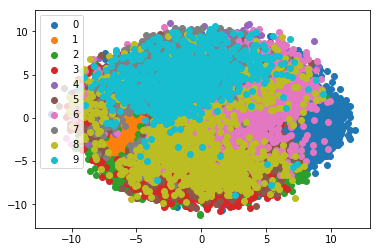

In [12]:
Q = w.eval(sess)
for i in range(10):
    plt.scatter(Q[i*1000:(i+1)*1000,0],Q[i*1000:(i+1)*1000,1])
plt.legend([i for i in range(10)])

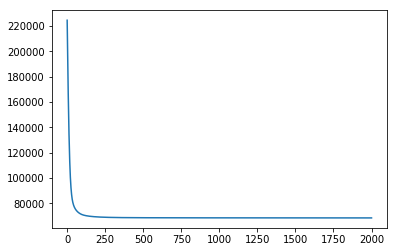

In [14]:
plt.plot([i+1 for i in range(num_iter)],loss)